We consider a circuit of the form

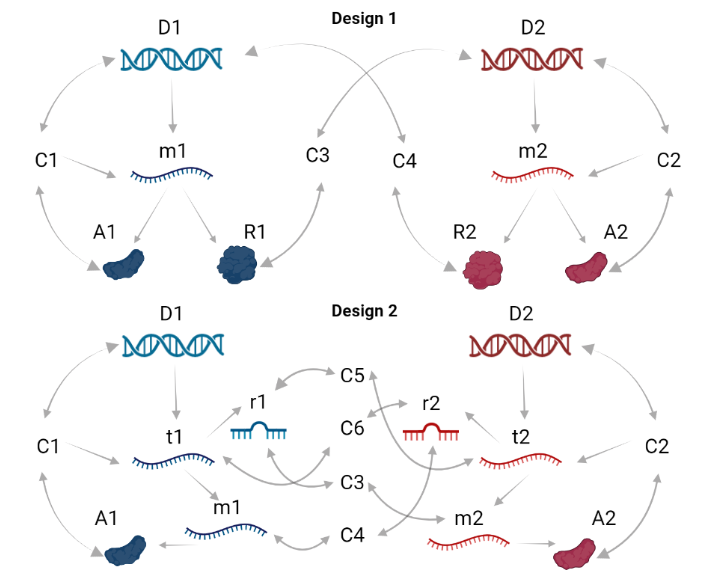

The dynamics are given by

$\dot{m}_i = (\alpha_0 + \alpha \frac{aA_i}{d}) \frac{D_{itot}}{1 + \frac{aA_i}{d} + \frac{a'R_i}{d'}} − \delta m_i$

$\dot{R}_i = \kappa m_j − \gamma R_i$

$\dot{A}_i = \kappa m_i − \gamma A_i$

We model a component that guarantees 

$R_i \leq k_p \gamma^{-1} m_j^*$

$A_i \geq k \gamma^{-1} m_i^*$

$R_j \geq k_p \gamma^{-1} m_i^*$

$A_j \leq k \gamma^{-1} m_j^*$

$m_i \geq H(A_i^*, R_i^*)D_{itot}$

$m_j \leq H(A_j^*, R_j^*)D_{jtot}$

and write the top-level system guarantees as

$A_i \geq A_i^{top}$

$R_i \leq R_i^{top}$

$A_j \leq A_j^{top}$

$R_j \geq R_j^{top}$

$m_i \geq m_i^{top}$

$m_j \leq m_j^{top}$

Using quotient, we want a bound on $\gamma$.

In [1]:
## constants
k_p = 5
k = 5
alpha0 = 0.25
alpha = 2
# gamma_inv = # Input
# Operating points for all variables
A_is = 1
A_js = 0.1
R_is = 0.1
R_js = 1
m_js = 0.1
m_is = 1
D_itots = 1
D_jtots = 1

A_itop = 0.8
R_itop = 0.2
A_jtop = 0.2
R_jtop = 0.8
m_itop = 0.8
m_jtop = 0.2

def H(A, R, D_tot):
    return ( (alpha0 + alpha * A) * D_tot ) / (1 + A + R)

from pacti.contracts import PolyhedralIoContract
from pacti.utils.plots import plot_guarantees
from pacti.iocontract import Var

top_level_objective = PolyhedralIoContract.from_strings(
    input_vars=[],
    output_vars=["A_i", "R_i", "A_j", "R_j", "m_i", "m_j"],
    assumptions=[],
    guarantees=[
        f"-A_i <= {-1*A_itop}",
        f"R_i <= {R_itop}",
        f"A_j <= {A_jtop}",
        f"-R_j <= {-1*R_jtop}",
        f"-m_i <= {-1*m_itop}",
        f"m_j <= {m_jtop}"
    ]
)

component_objective = PolyhedralIoContract.from_strings(
    input_vars=["gamma_inv", "D_itot", "D_jtot"],
    output_vars=["A_i", "R_i", "A_j", "R_j", "m_i", "m_j"],
    assumptions=[],
    guarantees=[
        f"-A_i + {k*m_is} gamma_inv <= 0",
        f"R_i  - {k_p*m_js} gamma_inv <= 0",
        f"A_j - {k*m_js} gamma_inv <= 0",
        f"-R_j + {k_p*m_is} gamma_inv <= 0",
        f"-m_i + {H(A_is, R_is, D_itots)} D_itot <= 0",
        f"m_j - {H(A_js, R_js, D_jtots)} D_jtot <= 0"
    ]
)
quotient_spec = top_level_objective.quotient(component_objective)

print(f"== Missing spec\n{quotient_spec}")

# _ = plots.plot_guarantees(contract=system_H_threshold,x_var="J1",y_var="J2",x_lims=(0,20),y_lims=(0,20),var_values={})

== Missing spec
InVars: []
OutVars:[gamma_inv, D_itot, D_jtot]
A: [
  
]
G: [
  0.5 gamma_inv <= 0.2
  -5 gamma_inv <= -0.8
  -1.071 D_itot <= -0.8
  0.2143 D_jtot <= 0.2
]


1. Find minimum and maximum values for A_is and R_is from the technical report. So that the bound on $\gamma$ makes sense and matches the used value in the report.

2. Repeat the analysis for 0,1 case and show impossibility for 1,1 case. Impossibility means that we use Pacti to compute quotient, and Pacti says that quotient cannot be found. Further note that Pacti is not complete so impossibility is not guaranteed but it can be modified to be complete by using different algorithms